In [1]:
# https://drive.google.com/drive/u/0/folders/1hJQy62ZarJnrF5UTzR_tKN452my-8n2t
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
! pip install gensim

In [ ]:
! pip install scipy

In [2]:
from gensim.models import FastText

In [24]:
path = '/content/drive/MyDrive/指向情緒案/data/eda/spm/sp_vectors.model'
model = FastText.load(path)
model.wv.vectors.shape

(5885, 100)

In [25]:
from scipy import spatial
M = model.wv.vectors
distM = spatial.distance.pdist(M, metric='cosine')
print(distM) # return a condensed distance matrix 

[0.64072205 0.83871459 0.65710326 ... 0.92967977 0.85346577 1.56744115]


In [26]:
import sys
sys.setrecursionlimit(100000)

In [44]:
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt
distM_sqr = spatial.distance.squareform(distM)
Link = hierarchy.linkage(distM_sqr, method='complete', metric='cosine', optimal_ordering = False)
# If True, the linkage matrix will be reordered so that the distance between successive leaves is minimal. 
# but it could be slow to turn it to True

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


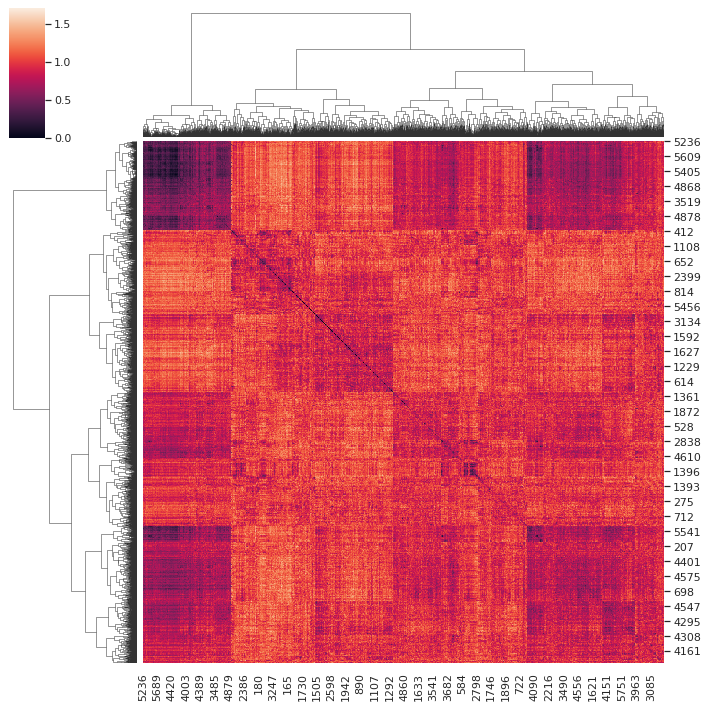

In [48]:
# no reordering
clsmap = sns.clustermap(data = distM_sqr, row_linkage= Link, col_linkage = Link, method = 'complete')
clsmap.savefig("cls_map.jpg")

In [ ]:
import numpy as np
import matplotlib as mpl
from matplotlib.pyplot import cm

In [ ]:
### show dendrogram ### 
hierarchy.set_link_color_palette(None)
fig = plt.figure(figsize=(20, 25))
dn = hierarchy.dendrogram(Link, orientation= 'top')
cmap = cm.rainbow(np.linspace(0, 1, 100))
hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:20]) for rgb in cmap])
plt.show()
hierarchy.set_link_color_palette(None)

In [ ]:
fig.savefig('complete_hclink.png')

In [8]:
threshold = 1.5
clusters = hierarchy.fcluster(Link, threshold, criterion = 'distance')
# to have datas separated into 3 groups

In [16]:
# ref = 'https://www.kaggle.com/sgalella/correlation-heatmaps-with-hierarchical-clustering# '
from collections import Counter
Counter(clusters)
print(len(clusters))

5885
(17313670,)


In [10]:
!pip install fastcluster

     |████████████████████████████████| 163kB 6.6MB/s 


In [39]:
import seaborn as sns; sns.set_theme()
Dict = dict()
for idx, category in enumerate(clusters):
  if category not in Dict:
    Dict[category]=[idx]
  else:
    Dict[category].append(idx)

In [70]:
def rearrange(M, idx):
  '''
  M = n*n matrix
  rearrange with specificed column and row indices 
  '''
  # print("original matrix:\n", M)
  idx_ma = np.empty_like(idx)
  idx_ma[idx] = np.arange(len(idx))
  M2= M[:, idx_ma]  # return a rearranged copy
  M3 = M2[np.argsort(reordered)]
  # print("permutated matrix:\n", M2)
  return M3

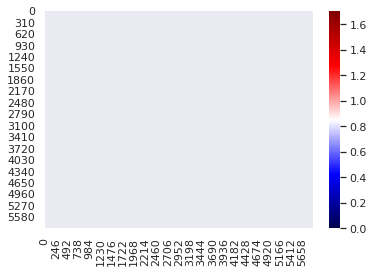

In [71]:
reordered =[]
for key in sorted(Dict):
  reordered.extend(Dict[key])
re_distM= rearrange(distM_sqr, reordered)
re_M = M[np.argsort(reordered)]
htmap = sns.heatmap(re_distM, cmap='seismic', annot=False)

In [68]:
!mkdir -p /content/drive/MyDrive/指向情緒案/data/eda/Clustering
filename = "Cmp_hcLink.pkl"

In [69]:
import pickle
with open(f"/content/drive/MyDrive/指向情緒案/data/eda/Clustering/{filename}", "wb") as fout:
   pickle.dump(Link, fout)
clsmap.savefig("/content/drive/MyDrive/指向情緒案/data/eda/Clustering/clsmap")

In [67]:
fig.savefig("/content/drive/MyDrive/指向情緒案/data/eda/Clustering/cmp_hcLink_dendrogram")